In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [3]:
import plotly
import plotly.express as px

In [4]:
fig = px.scatter(
    data_frame=diabetes, #датафрейм
    x = 'Glucose', #ось x
    y = 'Outcome', #ось y
    width=1000,
    height=700,
    log_x=True,
    log_y=True,
    title='2.5' #название
    )

fig.show()

In [5]:
cols_null_percent = diabetes.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Series([], dtype: float64)

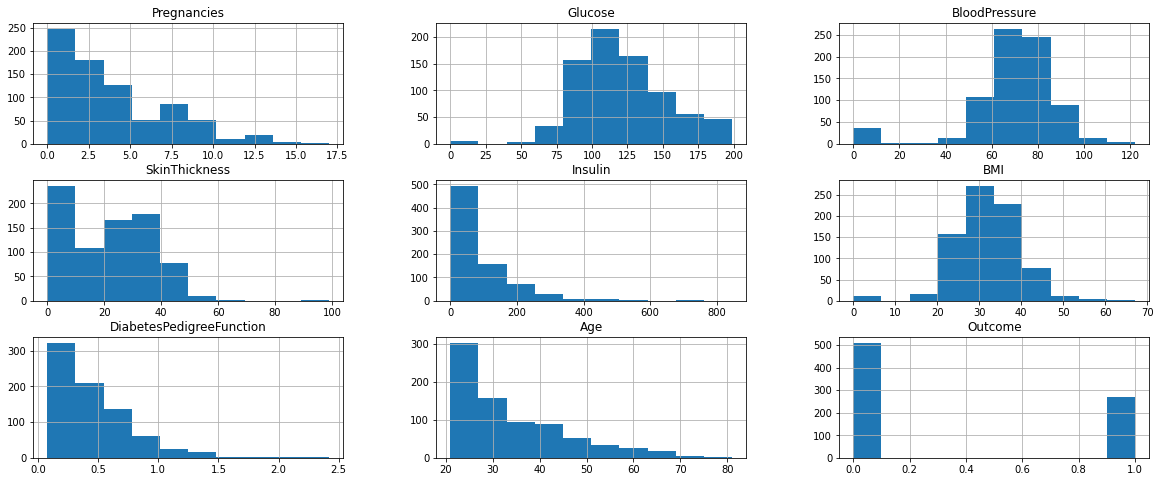

In [11]:
cols = diabetes.columns
diabetes[cols].hist(figsize=(20, 8));

In [13]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


In [14]:
#поиск дубликатов
dupl_columns = list(diabetes.columns)
mask = diabetes.duplicated(subset=dupl_columns)
sber_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 10


In [17]:
#удаление дубликатов
diabets_dedupped = diabetes.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {diabets_dedupped.shape[0]}')

Результирующее число записей: 768


In [16]:
#поиск и удаление дубликатов
duplicates = diabetes[diabetes.duplicated()]
print('Число дубликтов: {}'.format(duplicates.shape[0]))
diabetes = diabetes.drop_duplicates()
print('Результирующее число записей: {}'.format(diabetes.shape[0]))

Число дубликтов: 10
Результирующее число записей: 768


In [18]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [19]:
diabetes = diabetes.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes.shape[1]}')

Результирующее число признаков: 9


In [21]:
display(diabetes.isnull().tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False
767,False,False,False,False,False,False,False,False,False


In [39]:
def replacement(data):
    if data==0:
        return np.nan
    else:
        return data
diabetes['Glucose'] = diabetes['Glucose'].apply(replacement)
diabetes['BloodPressure'] = diabetes['BloodPressure'].apply(replacement)
diabetes['SkinThickness'] = diabetes['SkinThickness'].apply(replacement)
diabetes['Insulin'] = diabetes['Insulin'].apply(replacement)
diabetes['BMI'] = diabetes['BMI'].apply(replacement)
diabetes.isnull().mean().round(2).sort_values(ascending=False)


Insulin                     0.49
SkinThickness               0.30
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

In [40]:
#удаление признаков. где число пропусков больше 30%
cols_null_percent = diabetes.isnull().mean() * 100
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = diabetes.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
diabetes = diabetes.dropna(how='any', thresh=thresh, axis=1)
#отображаем результирующую долю пропусков
diabetes.isnull().mean()
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 54.0 KB


In [41]:
#отбрасываем строки с числом пропусков более 2 в строке
m = diabetes.shape[1] #число признаков после удаления столбцов
diabetes = diabetes.dropna(how='any', thresh=m-2, axis=0)
diabetes.shape[0]

761

In [43]:
#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'SkinThickness': diabetes['SkinThickness'].median(),
    'BloodPressure': diabetes['BloodPressure'].median(),
    'Glucose': diabetes['Glucose'].median(),
    'BMI': diabetes['BMI'].median(),
}
#заполняем оставшиеся записи константами в соответствии со словарем values
diabetes = diabetes.fillna(values)
#выводим результирующую долю пропусков
display(diabetes.isnull().mean())
display(diabetes['SkinThickness'].mean().round(1))

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

29.1

In [44]:
#замените пропуски на медиану. 
null_data = diabetes.isnull().sum()
cols = null_data[null_data>0].index
for col in cols:
    diabetes[col] = diabetes[col].fillna(diabetes[col].median())
print(diabetes['SkinThickness'].mean().round(1))

29.1


In [46]:
def outliers_iqr(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x=data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(diabetes, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


In [48]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(diabetes, 'SkinThickness')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


In [49]:
outliers, cleaned = outliers_iqr(diabetes, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [50]:
outliers, cleaned = outliers_iqr(diabetes, 'DiabetesPedigreeFunction',log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 0
Результирующее число записей: 761
